# Dielectric
---

In the small frequency limit we can write the dielectric function as
$$ \epsilon(i\omega,q) = X(q) + \omega^2 Y(q) $$
where $X(q)$ and $Y(q)$ can be calculated numerically (see the [code](correction.jl)).

In [1]:
using JLD
using PyPlot

In [2]:
using PyCall

In [3]:
dielectric,dielectric2= load("correction.jld","dielectric","dielectric2");

In [4]:
X = dielectric[:,1];
Y = dielectric2[:,1];

_Pole correction approximation_:
$$ \frac{1}{\epsilon(\omega,q)} = 1 + \frac{A_q}{\omega^2 - \omega_q^2} $$

Equating this with the previous equation in the small frequency limit we get
$$ A_q = -\frac{(X(q)-1)^2}{Y(q)} \quad \omega_q^2 = -\frac{X(q)(X(q)-1)}{Y(q)}$$

In [5]:
Aq = -(X .- 1.0).^2 ./Y;
ωq = -(X .* (X .- 1.0)) ./Y;

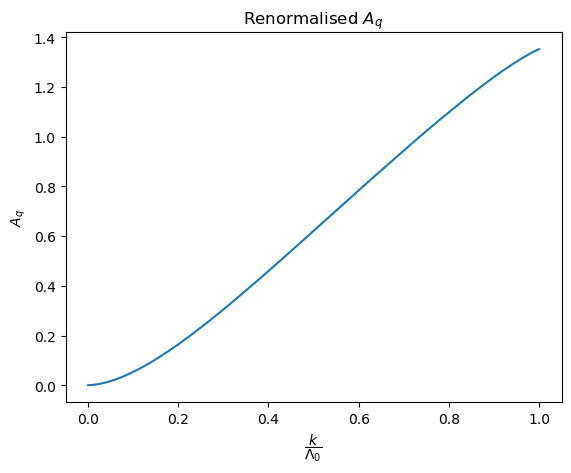

In [6]:
plot(range(0,stop=1,length=length(Aq)),Aq)
title(L"Renormalised $A_q$");
xlabel(L"$\dfrac{k}{\Lambda_0}$");
ylabel(L"$A_q$");

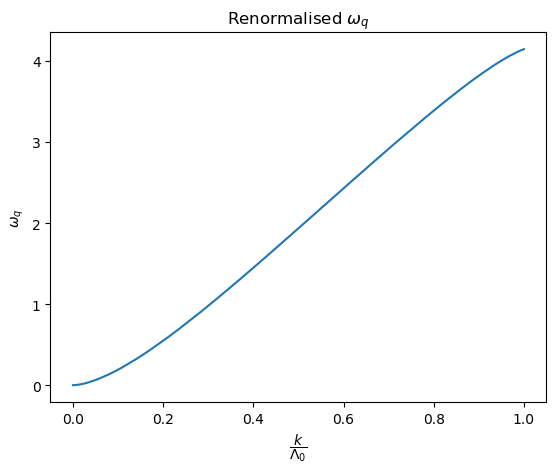

In [7]:
plot(range(0,stop=1,length=length(ωq)),ωq)
title(L"Renormalised $\omega_q$");
xlabel(L"$\dfrac{k}{\Lambda_0}$");
ylabel(L"$ω_q$");

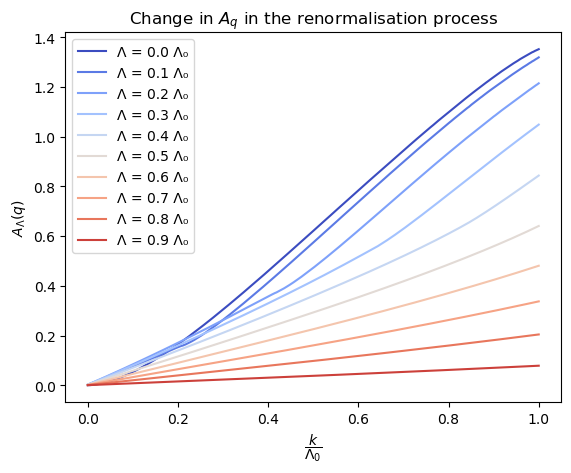

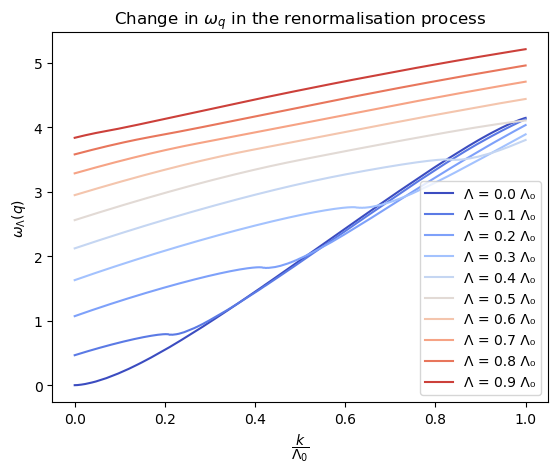

In [12]:
m = length(dielectric[1,:])
n = length(dielectric[:,1])
mpl = pyimport("matplotlib.cm")
cmap = mpl.get_cmap("coolwarm")
fig1 = figure()
fig2 = figure()
ax1 = fig1.add_subplot(111)
ax2 = fig2.add_subplot(111)
for i in 1:34:m
    Xp = dielectric[:,i]
    Yp = dielectric2[:,i]
    Aqp = -(Xp .- 1.0).^2 ./Yp;
    ωqp = -(Xp .* (Xp .- 1.0)) ./Yp;
    ax1.plot(range(0,stop=1,length=n),Aqp,color=cmap((i)/m),label="Λ = $(round((i)/m,digits=1)) Λ₀")
    ax2.plot(range(0,stop=1,length=n),ωqp,color=cmap((i)/m),label="Λ = $(round((i)/m,digits=1)) Λ₀")
end

ax1.legend()
ax1.set_title(L"Change in $A_q$ in the renormalisation process")
ax1.set_xlabel(L"$\dfrac{k}{\Lambda_0}$")
ax1.set_ylabel(L"$A_{\Lambda}(q)$")

ax2.set_title(L"Change in $\omega_q$ in the renormalisation process")
ax2.set_xlabel(L"$\dfrac{k}{\Lambda_0}$")
ax2.set_ylabel(L"$\omega_{\Lambda}(q)$")
ax2.legend();

## Real Part of the Self Energy

### At k=0

In [6]:
vel = load("correction.jld","velocity");
velocity = vel[:,1];

In [7]:
save("renormalised_data.jld","velocity",velocity,"Aq",Aq,"ωq",ωq)

In [13]:
1/n

0.0029154518950437317

In [36]:
list = []
for j in 1:10000
    omega = 10*j/10000 - 5
    int = 0.0
    for i in 1:n
       int += pi^2*Aq[i]*((omega - ωq[i])/((i/n)^2*velocity[i]^2 + (omega - ωq[i])^2) + (omega + ωq[i])/((i/n)^2*velocity[i]^2 + (omega + ωq[i])^2))/(2*ωq[i]^2)
    end
    int = int/n
    list = [list;int]
end

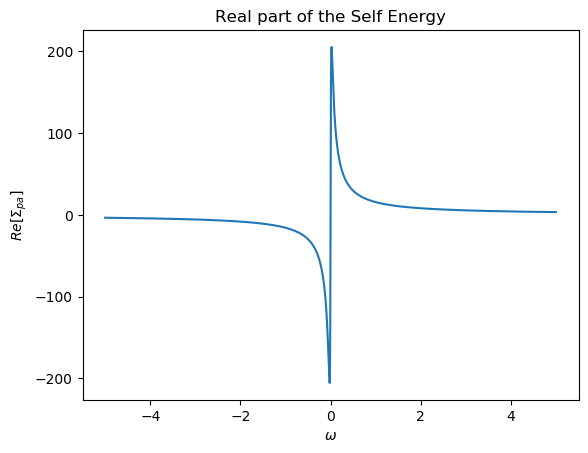

In [41]:
plot(range(-5,stop=5,length = 10000),list)
title("Real part of the Self Energy");
xlabel(L"\omega");
ylabel(L"Re[\Sigma_{pa}]");